In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

/usr/local/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# set params
# save as .mplstyle file and import with: plt.style.use('file')
#mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['lines.color'] = 'r'

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [3]:
burn = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
enri = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
cool = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
rxtr = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_reactor_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})

#burn.head()
# low burn data set
#low_burn = pd.read_csv('../results/19jul2018/trainset_1_fissact_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
#low_enri = pd.read_csv('../results/19jul2018/trainset_1_fissact_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
#low_cool = pd.read_csv('../results/19jul2018/trainset_1_fissact_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})


In [4]:
Y = 'TrueY'
knn = 'kNN'
dtree = 'DTree'
svr = 'SVR'

In [5]:
burn = burn[[knn, dtree, svr, Y]]//1000
cool = cool[[knn, dtree, svr, Y]]//30
enri = enri[[knn, dtree, svr, Y]]
# cool and enri have same size training sets
x = cool[[Y]]
y = enri[[Y]]

# Prediction Visualization (vs Ground Truth)

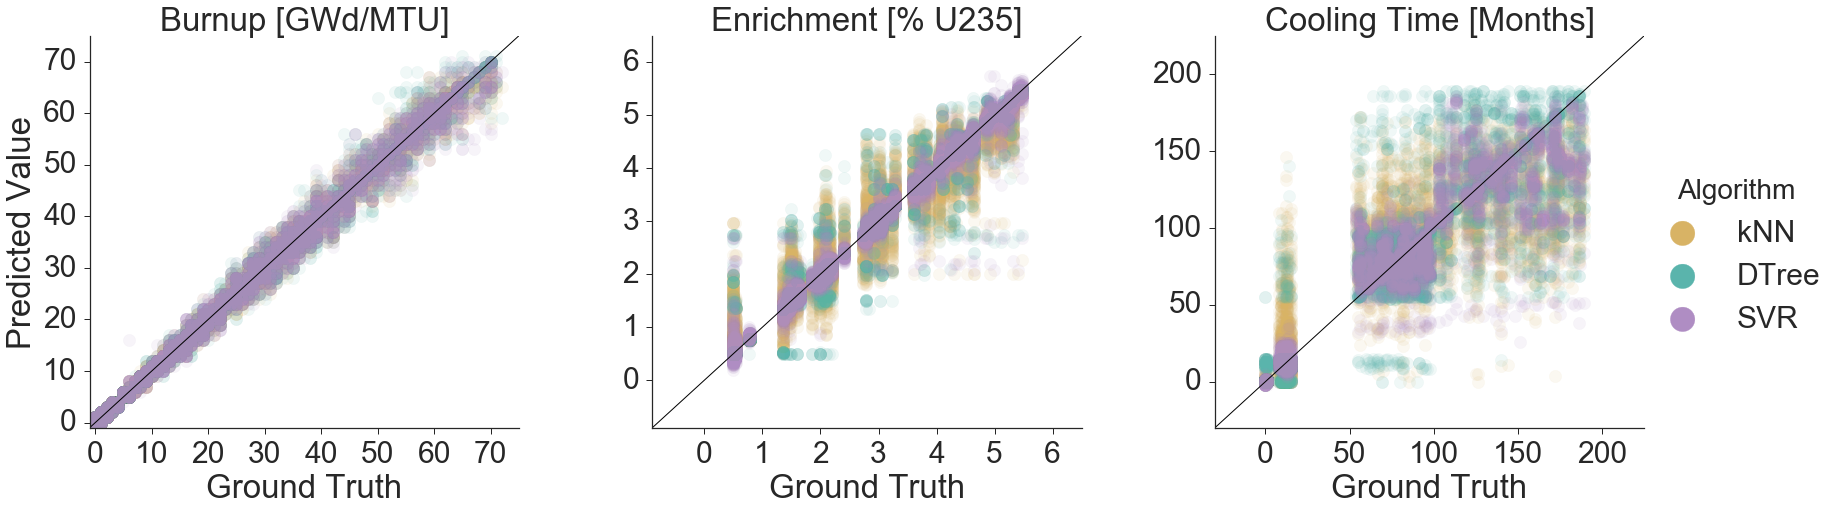

In [37]:
plt.clf()
sns.set(style="ticks", font_scale=3.0)

burn['Parameter'] = 'Burnup [GWd/MTU]'
enri['Parameter'] = 'Enrichment [% U235]'
cool['Parameter'] = 'Cooling Time [Months]'

pred_df = pd.DataFrame()
pred_df = pd.concat([burn, enri, cool])
pred_df = pred_df.melt(id_vars = ['TrueY', 'Parameter'], 
                       value_vars = [knn, dtree, svr], 
                       value_name='Predicted Value', var_name='Algorithm')
pred = sns.FacetGrid(data=pred_df, col="Parameter", hue="Algorithm", 
                     sharex=False, sharey=False, size=8, 
                     palette=sns.color_palette(med))
pred= pred.map(plt.scatter, 'TrueY', 'Predicted Value', s=150, alpha=0.09)

(pred.set_axis_labels("Ground Truth", "Predicted Value")
     .set_titles("{col_name}")
     .add_legend(markerscale=2))
pred.axes[0,0].set_ylim(-1, 75)
pred.axes[0,0].set_xlim(-1, 75)
pred.axes[0,0].plot([-1, 75], [-1, 75], 'k-', linewidth=1)
pred.axes[0,1].set_ylim(-0.9, 6.5)
pred.axes[0,1].set_xlim(-0.9, 6.5)
pred.axes[0,1].plot([-0.9, 6.5], [-0.9, 6.5], 'k-', linewidth=1)
pred.axes[0,2].set_ylim(-30, 225)
pred.axes[0,2].set_xlim(-30, 225)
pred.axes[0,2].plot([-30, 225], [-30, 225], 'k-', linewidth=1)

#leg = plt.legend(loc='center', bbox_to_anchor=(1.45, 0.5), markerscale=2)
#new_labels = ['k-Nearest Neighbors', 'Decision Trees', 'Support Vectors']
#for t, l in zip(leg.texts, new_labels): 
#    t.set_text(l)

for lh in pred._legend.legendHandles: lh.set_alpha(1)

pred.savefig('../results/4oct2018/graphs/preds-versus-trueY.png', bbox_inches='tight', transparent=True)

# Prediction Visualizations (Reactor Type)

In [6]:
#burn = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
enri = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
#cool = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
rxtr = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_reactor_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})

enri['Parameter'] = 'Enrichment [% U235]'
rxtr['Parameter'] = 'Reactor Type'

#enri.tail()

In [32]:
instances = enri['Instance'].tolist()
enri.sample(10)

,Instance,TrueY,kNN,DTree,SVR,Parameter
853,6.352e+03,2.05,2.505639,2.05,1.825812,Enrichment [% U235]
12637,1.140e+03,4.09,4.556927,4.09,4.335793,Enrichment [% U235]
8003,2.595e+02.1,4.93,4.925247,4.93,5.006225,Enrichment [% U235]
2850,5.085e+03,0.50,0.906257,0.50,0.378354,Enrichment [% U235]
14434,2.189e+03,5.48,5.480000,5.41,5.302823,Enrichment [% U235]
10493,1.200e+03.1,4.64,4.600437,4.64,4.557266,Enrichment [% U235]
5281,2.215e+03,1.49,1.242370,1.59,1.535402,Enrichment [% U235]
636,3.210e+02,2.09,1.993168,2.09,2.015236,Enrichment [% U235]
3379,3.423e+03,0.52,0.784214,0.50,1.007786,Enrichment [% U235]
8168,3.499e+03,1.35,1.897034,1.35,1.282357,Enrichment [% U235]


In [7]:
def splitXY(dfXY):
    lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
    dfX = dfXY.drop(lbls, axis=1)
    if 'total' in dfX.columns:
        dfX.drop('total', axis=1, inplace=True)
    r_dfY = dfXY.loc[:, lbls[0]]
    c_dfY = dfXY.loc[:, lbls[1]]
    e_dfY = dfXY.loc[:, lbls[2]]
    b_dfY = dfXY.loc[:, lbls[3]]
    return dfX, r_dfY, c_dfY, e_dfY, b_dfY

trainset = '../pkl_trainsets/2jul2018/22jul2018_trainset3_nucs_fissact_not-scaled.pkl'
trainXY = pd.read_pickle(trainset)

#trainXY = trainXY.sample(frac=0.6)
#trainX, rY, cY, eY, bY = splitXY(trainXY)
#trainX = scale(trainX)

In [27]:
#trainXY['idx'] = trainXY.index
trainXY.sample(5)
test = trainXY.index.tolist()
trainXY.index

Index(['0.000e+00', '5.437e+01', '5.497e+01', '5.551e+01', '6.044e+01',
       '7.677e+01', '4.416e+02', '2.386e+03', '3.315e+03', '5.436e+01.1',
       ...
       '6.280e+02.2', '6.417e+02', '6.417e+02.1', '6.422e+02', '6.424e+02',
       '6.502e+02', '6.632e+02', '1.063e+03', '3.282e+03', '5.888e+03'],
      dtype='object', length=24795)

In [33]:
#train = trainXY[trainXY.index.isin(instances)]
train = trainXY[(trainXY.index.isin(instances)) & (trainXY['Enrichment'].isin(enri['TrueY']))]
train.shape

(24455, 54)

In [30]:
train

,Burnup,CoolingTime,Enrichment,OrigenReactor,ReactorType,ba138,ce140,ce142,ce144,cs133,...,xe132,xe134,xe136,y89,zr91,zr92,zr93,zr94,zr96,idx
0.000e+00,0.00,0.000000,0.50,ce14x14,pwr,0.0000,0.0000,0.0000,0.000000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000e+00
5.437e+01,2168.50,0.000610,0.50,ce14x14,pwr,0.5795,0.3614,0.5000,0.000000,0.4829,...,0.3469,0.6788,0.9957,0.1188,0.1290,0.5063,0.5327,0.5499,0.544,5.437e+01
5.497e+01,2168.50,0.415858,0.50,ce14x14,pwr,0.5800,0.3670,0.5009,0.000000,0.4892,...,0.3509,0.6799,0.9957,0.1212,0.1316,0.5094,0.5364,0.5501,0.544,5.497e+01
5.551e+01,2168.50,1.211596,0.50,ce14x14,pwr,0.5800,0.3719,0.5009,0.000000,0.4946,...,0.3540,0.6799,0.9957,0.1232,0.1339,0.5097,0.5377,0.5501,0.544,5.551e+01
6.044e+01,2168.50,6.894594,0.50,ce14x14,pwr,0.5800,0.4133,0.5009,0.000000,0.5330,...,0.3706,0.6799,0.9957,0.1413,0.1542,0.5097,0.5386,0.5501,0.544,6.044e+01
7.677e+01,2168.50,38.708253,0.50,ce14x14,pwr,0.5800,0.4955,0.5009,0.000000,0.5712,...,0.3791,0.6799,0.9957,0.1929,0.2136,0.5097,0.5386,0.5501,0.544,7.677e+01
4.416e+02,2168.50,396.310748,0.50,ce14x14,pwr,0.5800,0.5533,0.5009,0.000000,0.5762,...,0.3793,0.6799,0.9957,0.3975,0.4882,0.5097,0.5386,0.5501,0.544,4.416e+02
2.386e+03,2168.50,2707.470609,0.50,ce14x14,pwr,0.5800,0.5533,0.5009,0.000000,0.5762,...,0.3793,0.6799,0.9957,0.3989,0.4919,0.5097,0.5386,0.5501,0.544,2.386e+03
3.315e+03,2168.50,4800.081669,0.50,ce14x14,pwr,0.5800,0.5533,0.5009,0.000000,0.5762,...,0.3793,0.6799,0.9957,0.3989,0.4919,0.5097,0.5386,0.5501,0.544,3.315e+03
5.436e+01.1,2168.50,0.000000,0.50,ce14x14,pwr,0.5795,0.3614,0.5000,0.000000,0.4829,...,0.3469,0.6788,0.9957,0.1188,0.1290,0.5063,0.5327,0.5499,0.544,5.436e+01.1


In [31]:
print((len(set(instances)), len(instances)))

(3953, 14877)


# Prediction Visualizations (Enrich vs Cooling Time)


6 Oct 2018:
Cannot do this anymore wrt burnup, need to run special case with exact same training sets in order to do this. 

## rando data set

In [57]:
cool.max()

kNN      182.0
DTree    189.0
SVR      186.0
TrueY    189.0
dtype: float64

In [58]:
def plot_me(predx, predy, title, fig, ax):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Cooling Time [Months]', fontsize=16)
    ax.set_xlim(-1, 200)
    ax.tick_params(labelsize=16)
    
    ax.scatter(x, y, c=colors['MBrwn'], s=50, alpha=0.02, linewidths=0.01, 
               marker='o', label='Ground Truth')
    ax.scatter(predx, predy, c=colors['MTeal'], s=50, alpha=0.02, linewidths=0.01, 
               marker='s', label='Prediction')
    
    # Double x axis
    #ax2 = ax.twiny()
    #ax2.set_xlim(ax.get_xlim())
    #ax2.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9])
    #ax2.set_xticklabels(train_frac)
    #ax2.set_xlabel('Fraction of Training Set', fontsize=12)
    
    return fig

In [63]:
def plot_enr_v_burn():
    fig, alg_ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 9))
    k = [knn, 'k-Nearest Neighbors', alg_ax[0]]
    d = [dtree, 'Decision Trees', alg_ax[1]]
    s = [svr, 'Support Vectors', alg_ax[2]]
    for alg, title, ax in [k, d, s]:
        predx = cool[alg]
        predy = enri[alg]
        plot_me(predx, predy, title, fig, ax)
        
    alg_ax[0].set_ylabel('Enrichment [%U235]', fontsize=16)
    #plt.ylim(0, 6.2)
    title = 'Comparisons of predictions against ground truth for three algorithms'
    fig.suptitle(title, fontsize=24)
    fig.subplots_adjust(top=.9)
    leg = alg_ax[2].legend(loc='center', bbox_to_anchor=(1.4, 0.5), markerscale=2.5)
    for l in leg.legendHandles:
        l.set_alpha(1)
    
    fig.show()
    
    return fig

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


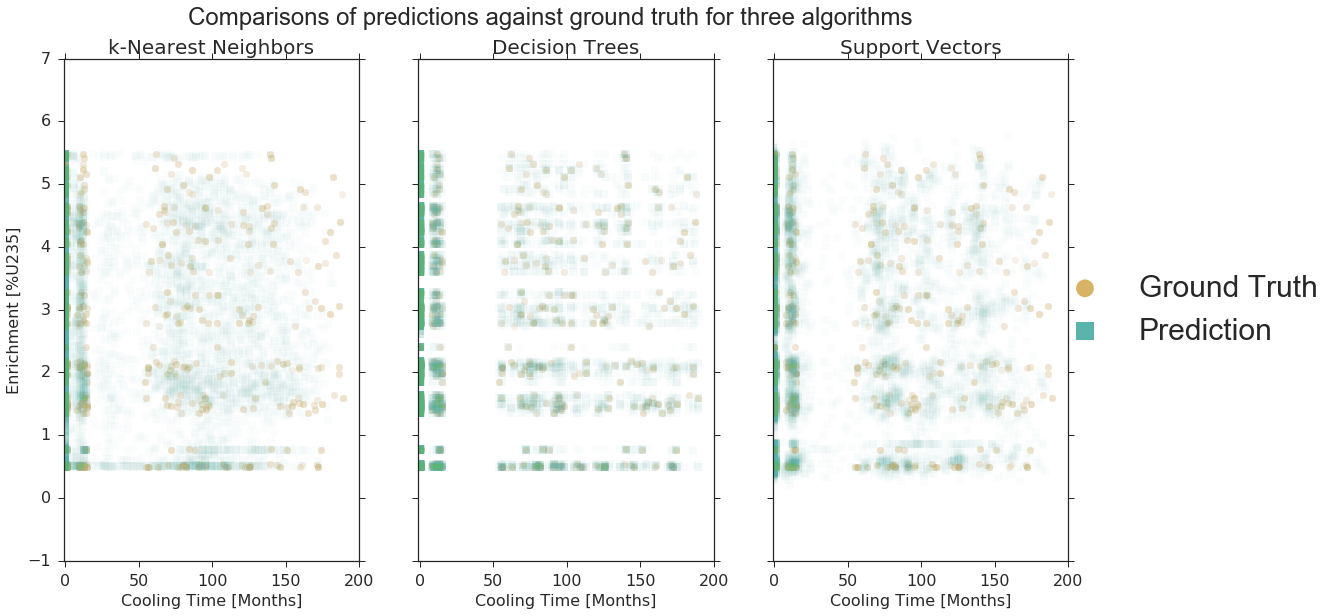

In [64]:
plt.clf()

fig = plot_enr_v_burn()
fig.savefig('../results/4oct2018/graphs/preds-versus-trueY__enr-v-cool.png', bbox_inches='tight', transparent=True)

## SFCOMPO data set

In [15]:
#trainXY = pd.read_pickle("../sfcompo_pickles/not-scaled_trainset_nucs_fissact_8dec.pkl")
# predictions
rxtr = pd.read_csv('../results/19jul2018/trainset_2_fissact_reactor_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# MWd/MTU
burn = pd.read_csv('../results/19jul2018/trainset_2_fissact_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# %u235
enri = pd.read_csv('../results/19jul2018/trainset_2_fissact_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# days
cool = pd.read_csv('../results/19jul2018/trainset_2_fissact_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})

knn = 'kNN'
rr = 'Ridge'
svr = 'SVR'
Y = 'TrueY'

In [16]:
burn = burn[[knn, rr, svr, Y]]//1000
cool = cool[[knn, rr, svr, Y]]//30
enri = enri[[knn, rr, svr, Y]]
x = burn[[Y]]
y = enri[[Y]]

In [17]:

cool.max()


kNN      76.0
Ridge    92.0
SVR      79.0
TrueY    76.0
dtype: float64

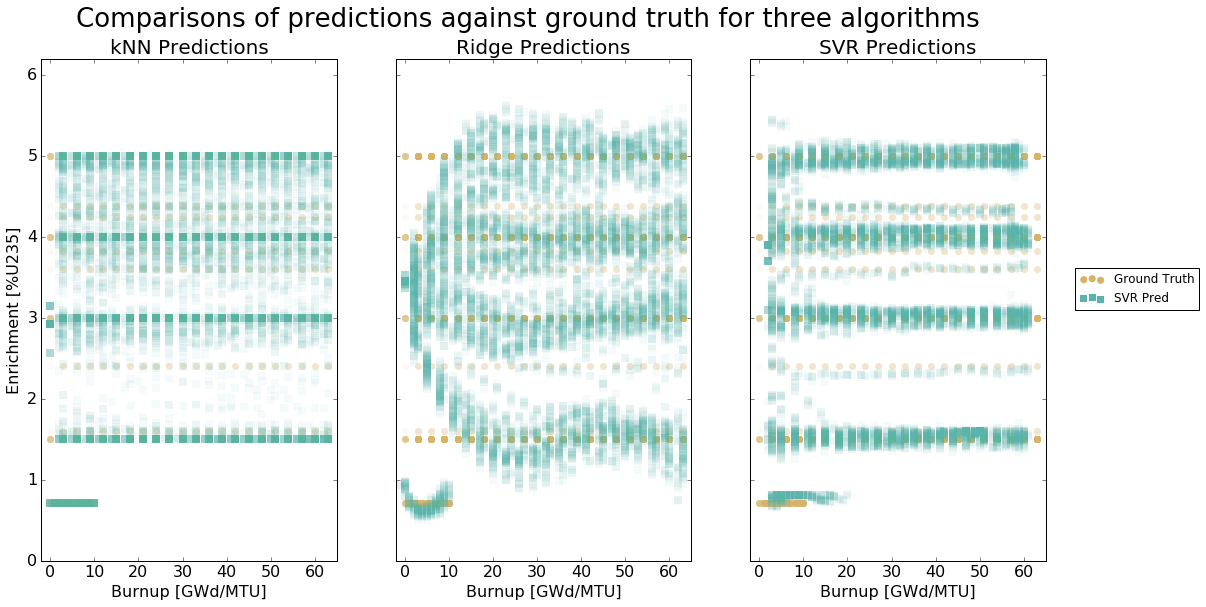

In [15]:
fig.clf()

fig, (ax_knn, ax_rr, ax_svr) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18,9))
plt.xlim(-2, 65)
plt.ylim(0, 6.2)
ax_knn.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_rr.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_svr.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_knn.set_ylabel('Enrichment [%U235]', fontsize=16)

ax_knn.tick_params(labelsize=16)
ax_rr.tick_params(labelsize=16)
ax_svr.tick_params(labelsize=16)

# GROUND TRUTHS
ax_knn.scatter(x, y, c=colors['MBrwn'], s=50, alpha=0.06, linewidths=0.01, marker='o', label='Ground Truth')
ax_rr.scatter(x, y, c=colors['MBrwn'], s=50, alpha=0.06, linewidths=0.01, marker='o', label='Ground Truth')
ax_svr.scatter(x, y, c=colors['MBrwn'], s=50, alpha=0.06, linewidths=0.01, marker='o', label='Ground Truth')

# PREDICTIONS
ax_knn.scatter(burn[[knn]], enri[[knn]], c=colors['MTeal'], s=50, alpha=0.06, linewidths=0.01, marker='s', label='kNN Pred')
ax_rr.scatter(burn[[rr]], enri[[rr]], c=colors['MTeal'], s=50, alpha=0.06, linewidths=0.01, marker='s', label='Ridge Pred')
ax_svr.scatter(burn[[svr]], enri[[svr]], c=colors['MTeal'], s=50, alpha=0.06, linewidths=0.01, marker='s', label='SVR Pred')

ax_knn.set_title('kNN Predictions', fontsize=20)
ax_rr.set_title('Ridge Predictions', fontsize=20)
ax_svr.set_title('SVR Predictions', fontsize=20)
plt.suptitle('Comparisons of predictions against ground truth for three algorithms', fontsize=26)
leg = plt.legend(loc=(1.1, 0.5))
for l in leg.legendHandles:
    l.set_alpha(1)
#fig.savefig('../results/21jul2018/graphs/2preds-versus-trueY.png', bbox_inches='tight', transparent=True)
plt.show()

## Low burnup data set

## SFCOMPO data set

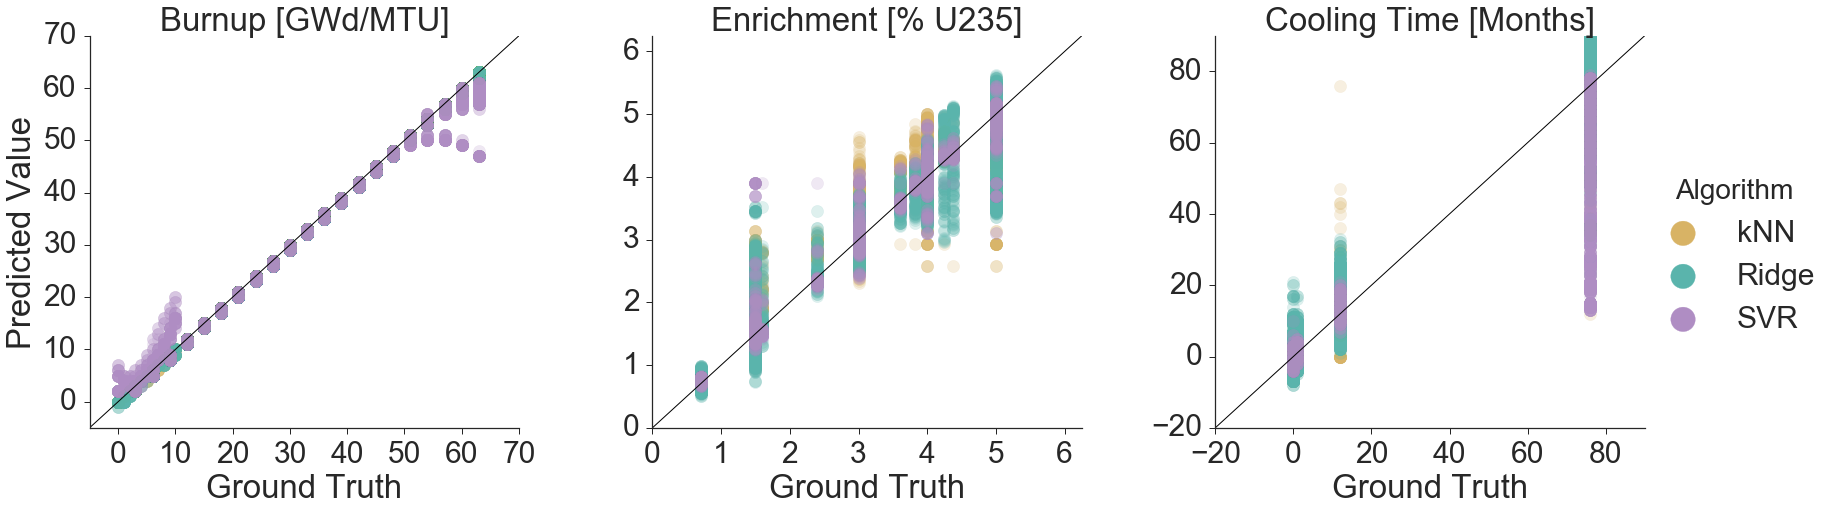

In [30]:
plt.clf()
sns.set(style="ticks", font_scale=3.0)

burn['Parameter'] = 'Burnup [GWd/MTU]'
enri['Parameter'] = 'Enrichment [% U235]'
cool['Parameter'] = 'Cooling Time [Months]'

pred_df = pd.DataFrame()
pred_df = pd.concat([burn, enri, cool])
pred_df = pred_df.melt(id_vars = ['TrueY', 'Parameter'], 
                       value_vars = ['kNN', 'Ridge', 'SVR'], 
                       value_name='Predicted Value', var_name='Algorithm')
pred = sns.FacetGrid(data=pred_df, col="Parameter",
                     hue="Algorithm", 
                     sharex=False, sharey=False, size=8, 
                     palette=sns.color_palette(med))
pred= pred.map(plt.scatter, 'TrueY', 'Predicted Value', s=150, alpha=0.2)

(pred.set_axis_labels("Ground Truth", "Predicted Value")
     .set_titles("{col_name}")
     .add_legend(markerscale=2))
pred.axes[0,0].set_ylim(-5, 70)
pred.axes[0,0].set_xlim(-5, 70)
pred.axes[0,0].plot([-5, 70], [-5, 70], 'k-', linewidth=1)
pred.axes[0,1].set_ylim(0, 6.25)
pred.axes[0,1].set_xlim(0, 6.25)
pred.axes[0,1].plot([0, 6.25], [0, 6.25], 'k-', linewidth=1)
pred.axes[0,2].set_ylim(-20, 90)
pred.axes[0,2].set_xlim(-20, 90)
pred.axes[0,2].plot([-20, 90], [-20, 90], 'k-', linewidth=1)
for lh in pred._legend.legendHandles: lh.set_alpha(1)

pred.savefig('../results/19jul2018/graphs/2preds-versus-trueY-detailed.png', bbox_inches='tight', transparent=True)

# NOTES

for predictions in both training sets, burnup is good, and the others are bad

the validation and learning curves were (and thus alg hyperparams) were optimized for burnup only, need to do this separately for each prediction

may need to just run hyperparam optimization for each alg (knn, rr, svr) each time before prediction. 
Variables include: 
- trainset (1 or 2)
- nuclide subset (fiss, act, fissact, top_n)
- parameter being predicted (rxtr, burn, enri, cooling)
- scoring metric (exp var for diagnostic curves now, but also r2, RMSE, MAE)
